# Consumer Complaint Classification 



Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import warnings

warnings.filterwarnings('ignore')

### Import Data into a pandas dataframe

In [2]:
df_train = pd.read_csv('D:/VSCODE code/CIS550 Code/AML_Project/data/training_data.csv')
df_train.head()

,Complaint,Class
0,hello mailed dispute letter bureau remove one ...,credit_reporting
1,equifax violation following section equifax re...,credit_reporting
2,deceptive offering promotional payment plan ma...,credit_card
3,whenever try connect pnc bank checking account...,retail_banking
4,account number concern presented yet handled r...,credit_reporting


In [3]:
df_test = pd.read_csv(r'D:/UMassD Files/CIS 550/test_data.csv', names=['Complaint'])

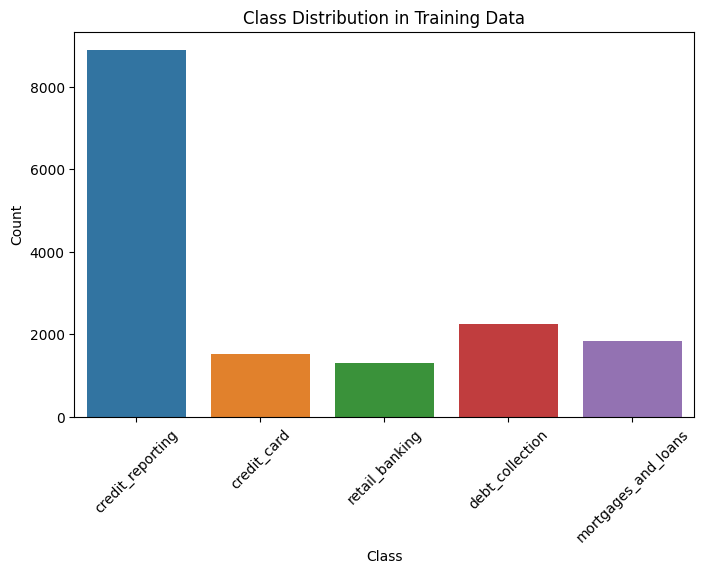

In [56]:
# Plotting the distribution of classes
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

### Data Preprocessing

In [4]:
#removing the NaN/NULL value
df_train.dropna(how='any',axis=0, inplace = True)

In [5]:
#defining funcction to clean dataset
def text_cleaning(text):
    text = [re.sub(r'@\S+', '', t) for t in text ]
    text = [re.sub(r'#', '', t) for t in text ]
    text = [re.sub(r"https?\S+", '', t) for t in text ]
    text = [re.sub(r"\d*", '', t) for t in text ]    
    text = [re.sub(r"[+|-|*|%]", '', t) for t in text ]  
    text = [re.sub(r"[^^(éèêùçà)\x20-\x7E]", '', t) for t in text]
    return text

In [6]:
df_train['Cleaned_Text'] = text_cleaning(df_train['Complaint'])

In [7]:
df_train['Class'].value_counts()

Class
credit_reporting       8889
debt_collection        2257
mortgages_and_loans    1851
credit_card            1518
retail_banking         1320
Name: count, dtype: int64

In [8]:
# Import relevant NLP libraries
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet') 
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df = pd.DataFrame(data = df_train)

In [10]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree
df['Unpunct_Text']= df['Cleaned_Text'].apply(lambda x:remove_punctuation(x))

In [11]:
#changing to lower case
df['Lowercase_Text']= df['Unpunct_Text'].apply(lambda x: x.lower())

In [13]:
#defining function for tokenization
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens
df['Tokenised_Text']=df['Unpunct_Text'].apply(lambda x: tokenization(x))

In [12]:
#defining the function to remove stopwords from tokenized text
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['No_Stopwords'] = df['Tokenised_Text'].apply(lambda x: remove_stopwords(x))

In [14]:
#defining the function to remove stopwords from tokenized text
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
df['No_Stopwords'] = df['Tokenised_Text'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Stemming- Porter Stemmer
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['Stemmed_Text']=df['No_Stopwords'].apply(lambda x: stemming(x))

In [17]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['Lemmatized_Text']=df['Stemmed_Text'].apply(lambda x:lemmatizer(x))

In [18]:
df.head()

,Complaint,Class,Cleaned_Text,Unpunct_Text,Lowercase_Text,No_Stopwords,Tokenised_Text,Stemmed_Text,Lemmatized_Text
0,hello mailed dispute letter bureau remove one ...,credit_reporting,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,hello mailed dispute letter bureau remove one ...,"[hello, mailed, dispute, letter, bureau, remov...","[hello, mailed, dispute, letter, bureau, remov...","[hello, mail, disput, letter, bureau, remov, o...","[hello, mail, disput, letter, bureau, remov, o..."
1,equifax violation following section equifax re...,credit_reporting,equifax violation following section equifax re...,equifax violation following section equifax re...,equifax violation following section equifax re...,"[equifax, violation, following, section, equif...","[equifax, violation, following, section, equif...","[equifax, violat, follow, section, equifax, re...","[equifax, violat, follow, section, equifax, re..."
2,deceptive offering promotional payment plan ma...,credit_card,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,deceptive offering promotional payment plan ma...,"[deceptive, offering, promotional, payment, pl...","[deceptive, offering, promotional, payment, pl...","[decept, offer, promot, payment, plan, market,...","[decept, offer, promot, payment, plan, market,..."
3,whenever try connect pnc bank checking account...,retail_banking,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,whenever try connect pnc bank checking account...,"[whenever, try, connect, pnc, bank, checking, ...","[whenever, try, connect, pnc, bank, checking, ...","[whenev, tri, connect, pnc, bank, check, accou...","[whenev, tri, connect, pnc, bank, check, accou..."
4,account number concern presented yet handled r...,credit_reporting,account number concern presented yet handled r...,account number concern presented yet handled r...,account number concern presented yet handled r...,"[account, number, concern, presented, yet, han...","[account, number, concern, presented, yet, han...","[account, number, concern, present, yet, handl...","[account, number, concern, present, yet, handl..."


---

### Supervised Learning Models

In [19]:
# Import necessary Libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
data = df['Lemmatized_Text'].tolist()
y = df['Class']

In [21]:
# Flatten the list of lists
flattened_data = [' '.join(doc) for doc in data]

#### Vectorization

In [23]:
vectorizer = TfidfVectorizer(min_df=5, max_df = 0.7)
X = vectorizer.fit_transform(flattened_data).toarray()

In [24]:
#Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [25]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("--------Logistic Regression-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, log_reg_pred))
print('\nClassification Report:\n', classification_report(y_test, log_reg_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, log_reg_pred))

--------Logistic Regression-------

Confusion Matrix:
 [[ 239   35    7   10   22]
 [  23 1650   58   32    4]
 [   6  134  298   18    5]
 [   3   41   10  318    6]
 [  20    9    2    3  214]]

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.82      0.76      0.79       313
   credit_reporting       0.88      0.93      0.91      1767
    debt_collection       0.79      0.65      0.71       461
mortgages_and_loans       0.83      0.84      0.84       378
     retail_banking       0.85      0.86      0.86       248

           accuracy                           0.86      3167
          macro avg       0.84      0.81      0.82      3167
       weighted avg       0.86      0.86      0.86      3167


Accuracy Score:
 0.8585412061888222


#### Random Forest Classifier

In [26]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
rf_pred = rf.predict(X_test)
print("--------Random Forest-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test,rf_pred))
print('\nClassification Report:\n', classification_report(y_test,rf_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, rf_pred))

--------Random Forest-------

Confusion Matrix:
 [[ 188   79    4   15   27]
 [  12 1693   32   27    3]
 [   5  187  248   20    1]
 [   4   63    9  296    6]
 [  25   23    1    8  191]]

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.80      0.60      0.69       313
   credit_reporting       0.83      0.96      0.89      1767
    debt_collection       0.84      0.54      0.66       461
mortgages_and_loans       0.81      0.78      0.80       378
     retail_banking       0.84      0.77      0.80       248

           accuracy                           0.83      3167
          macro avg       0.82      0.73      0.77      3167
       weighted avg       0.83      0.83      0.82      3167


Accuracy Score:
 0.8260183138616988


### Support Vector Classifier

In [30]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("--------SVM-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, svm_pred))
print('\nClassification Report:\n', classification_report(y_test, svm_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, svm_pred))

--------SVM-------

Confusion Matrix:
 [[ 244   34    5   10   20]
 [  21 1647   60   34    5]
 [   6  123  313   17    2]
 [   5   43    7  317    6]
 [  22    8    1    4  213]]

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.82      0.78      0.80       313
   credit_reporting       0.89      0.93      0.91      1767
    debt_collection       0.81      0.68      0.74       461
mortgages_and_loans       0.83      0.84      0.83       378
     retail_banking       0.87      0.86      0.86       248

           accuracy                           0.86      3167
          macro avg       0.84      0.82      0.83      3167
       weighted avg       0.86      0.86      0.86      3167


Accuracy Score:
 0.8632775497316072


### HyperParameter Tuning

In [31]:
data2 = df['Lemmatized_Text'].tolist()
labels = df['Class']

In [32]:
# Flatten the list of lists
flattened_data2 = [' '.join(doc) for doc in data2]

In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(flattened_data2, labels, test_size=0.2, random_state=42, stratify=labels)

In [34]:
# Types of Vectorizer used
vectorizer_types = ['bow','tfidf']

def vectorizer(vectorizer_type):
    vectorizer = TfidfVectorizer(min_df=5, max_df=0.7)

    if vectorizer_type =='bow':
        vectorizer = CountVectorizer(min_df=5, max_df=0.7, ngram_range=(1,3))
    elif vectorizer_type =='tfidf':
        vectorizer = TfidfVectorizer(min_df=5, max_df=0.7)

    return vectorizer

In [43]:
parameters=[
    {
        'clf': LogisticRegression(max_iter= 100),
        'clf__penalty': ['l2', 'none'],
        'clf__multi_class': ['ovr', 'multinomial'],
        'clf__C': np.linspace(0.01, 20, 2)
    },
    {
        'clf': RandomForestClassifier(class_weight='balanced'),
        'clf__criterion': ['gini', 'entropy'],
        'clf__n_estimators': [30, 200],
        'clf__max_depth': [10, 20],
    },
    {
        'clf':SVC(max_iter=100, probability=True),
        'clf__C': [0.1,10,50],
        'clf__kernel': ['sigmoid','rbf']
    }    
]

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

results = []


for model in parameters:
    clf = model.pop('clf')
    print(f"\nStarted {str(clf)}")
    print("-------------------------------------------")
    for vectorizer_type in vectorizer_types:
        print(f"\nStarted Vectorizer {str(vectorizer_type)}")
        print("-------------------------------------------")
        
        pipeline = Pipeline([
        ("vector", vectorizer(vectorizer_type)),
        ("select", SelectKBest(score_func = chi2, k = 10)),
        ("clf", clf)])

        print("\nStarted GridSearchCV")
        print("-------------------------------------------")
        grid_model = GridSearchCV(pipeline, model, verbose=2, cv=10
                                , scoring='accuracy', error_score='raise')
        grid_model.fit(X_train, Y_train)

        print("Done")
        print(f"Training Score: {grid_model.best_score_}")
        print(f"Parameters: {grid_model.best_params_}") 
        print(f"Best Classifier: {grid_model.best_estimator_}")
        
        results.append({
            'Model': clf,
            'Best_Score': grid_model.best_score_,
            'Best_Params': grid_model.best_params_
        })


Started LogisticRegression()
-------------------------------------------

Started Vectorizer bow
-------------------------------------------

Started GridSearchCV
-------------------------------------------
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   2.0s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[CV] END clf__C=0.001, clf__multi_class=ovr, clf__penalty=l2; total time=   1.7s
[C

In [45]:
print(results)
classification_results= pd.DataFrame(results, columns=['Model', 'Best_Score', 'Best_Params'])
#np.savetxt("Classification_Results.csv", classification_results, delimiter = ',')
print(classification_results)

[{'Model': LogisticRegression(), 'Best_Score': 0.7196870741174373, 'Best_Params': {'clf__C': 0.001, 'clf__multi_class': 'multinomial', 'clf__penalty': 'none'}}, {'Model': LogisticRegression(), 'Best_Score': 0.712977004056054, 'Best_Params': {'clf__C': 0.001, 'clf__multi_class': 'multinomial', 'clf__penalty': 'none'}}, {'Model': RandomForestClassifier(class_weight='balanced'), 'Best_Score': 0.7101392000857844, 'Best_Params': {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 30}}, {'Model': RandomForestClassifier(class_weight='balanced'), 'Best_Score': 0.6896074991490141, 'Best_Params': {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__n_estimators': 200}}, {'Model': SVC(max_iter=100, probability=True), 'Best_Score': 0.4711696597677588, 'Best_Params': {'clf__C': 50, 'clf__kernel': 'sigmoid'}}, {'Model': SVC(max_iter=100, probability=True), 'Best_Score': 0.45720339247217306, 'Best_Params': {'clf__C': 0.1, 'clf__kernel': 'sigmoid'}}]
                               

In [46]:
classification_results.head()

,Model,Best_Score,Best_Params
0,LogisticRegression(),0.719687,"{'clf__C': 0.001, 'clf__multi_class': 'multino..."
1,LogisticRegression(),0.712977,"{'clf__C': 0.001, 'clf__multi_class': 'multino..."
2,RandomForestClassifier(class_weight='balanced'),0.710139,"{'clf__criterion': 'gini', 'clf__max_depth': 2..."
3,RandomForestClassifier(class_weight='balanced'),0.689607,"{'clf__criterion': 'gini', 'clf__max_depth': 2..."
4,"SVC(max_iter=100, probability=True)",0.471170,"{'clf__C': 50, 'clf__kernel': 'sigmoid'}"


---

##### Using Saga solver for Logistic Regression

In [54]:
#Splitting the data into training and testing datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=40)

In [55]:
log_reg2 = LogisticRegression(penalty='elasticnet', solver= 'saga',l1_ratio=0.6)
log_reg2.fit(X_train2, y_train2)
log_reg_pred2 = log_reg2.predict(X_test2)
print("--------Logistic Regression-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test2, log_reg_pred2))
print('\nClassification Report:\n', classification_report(y_test2, log_reg_pred2))
print('\nAccuracy Score:\n', accuracy_score(y_test2, log_reg_pred2))

--------Logistic Regression-------

Confusion Matrix:
 [[ 235   50    5    6   11]
 [  27 1649   65   38    6]
 [  11  135  296   13    2]
 [   6   43   11  297    9]
 [  14   11    2    4  221]]

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.80      0.77      0.78       307
   credit_reporting       0.87      0.92      0.90      1785
    debt_collection       0.78      0.65      0.71       457
mortgages_and_loans       0.83      0.81      0.82       366
     retail_banking       0.89      0.88      0.88       252

           accuracy                           0.85      3167
          macro avg       0.83      0.81      0.82      3167
       weighted avg       0.85      0.85      0.85      3167


Accuracy Score:
 0.8519103252289233
